In [34]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold

In [3]:
data = pd.read_csv('../data/merged_data.csv')

In [4]:
data.head()

,Unnamed: 0,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3140 non-null   int64  
 1   county_code        3140 non-null   int64  
 2   COUNTY             3140 non-null   object 
 3   STATEABBREVIATION  3140 non-null   object 
 4   YEAR               3140 non-null   int64  
 5   AMAT_fac           3140 non-null   float64
 6   HIVdiagnoses       3140 non-null   float64
 7   HIVincidence       3140 non-null   float64
 8   HIVprevalence      3140 non-null   float64
 9   MH_fac             3140 non-null   float64
 10  Med_AMAT_fac       3140 non-null   float64
 11  Med_MH_fac         3140 non-null   float64
 12  Med_SA_fac         3140 non-null   float64
 13  Med_SMAT_fac       3140 non-null   float64
 14  Med_TMAT_fac       3140 non-null   float64
 15  PLHIV              3140 non-null   float64
 16  Population         3140 

In [56]:
X = data['HIVprevalence']
y = data['HIVincidence']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
n_folds = 10
kf = KFold(n_folds)

for train, test in kf.split(X_train):
    model = sm.OLS(y_train[train], X_train[train])
    results = model.fit()
    y_hat = results.predict(X_test[test])

In [64]:
def find_rsquared(y, X):
    model = sm.OLS(y, X)
    results = model.fit()
    return results

In [65]:
find_rsquared(y, X).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           HIVincidence   R-squared (uncentered):                   0.222
Model:                            OLS   Adj. R-squared (uncentered):              0.221
Method:                 Least Squares   F-statistic:                              894.1
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                   4.36e-173
Time:                        16:22:09   Log-Likelihood:                         -12969.
No. Observations:                3140   AIC:                                  2.594e+04
Df Residuals:                    3139   BIC:                                  2.595e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
HIVprevalence     0.0327      0.001     29.902      0.000       0.031       0.035
==============================================================================
Omnibus:                     9139.953   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        495689693.150
Skew:                          39.328   Prob(JB):                         0.00
Kurtosis:                    1947.871   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
results.params['HIVprevalence']

0.03265009742547359

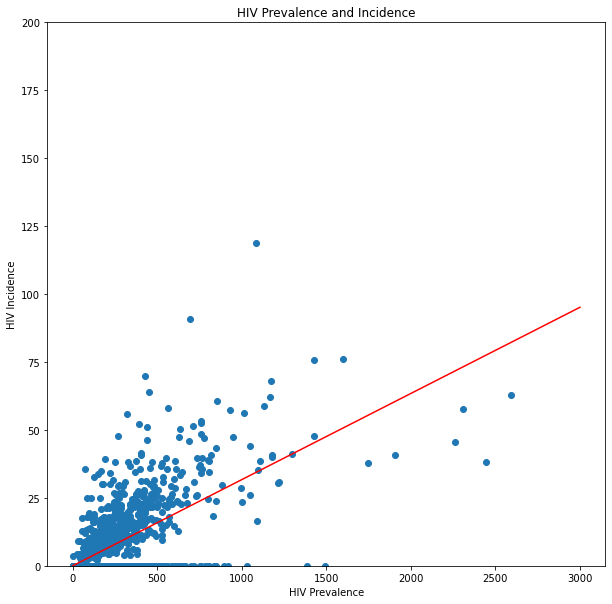

In [67]:
xx = np.linspace(0, 3000, len(X))
best_line = results.params['HIVprevalence']*xx

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X, y)
ax.plot(xx, best_line, color='red')
ax.set_title('HIV Prevalence and Incidence')
ax.set_xlabel('HIV Prevalence')
ax.set_ylabel('HIV Incidence')
ax.set_ylim(0,200)
plt.savefig('../images/hiv_prev_incidence');

In [48]:
data.corr()

,Unnamed: 0,county_code,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
Unnamed: 0,1.000000,0.996142,NaN,-0.033837,-0.055080,-0.041532,-0.088948,-0.055415,-0.025928,-0.047157,...,0.077622,-0.144540,-0.058201,-0.054290,-0.054288,-0.005895,-0.005605,-0.186571,-0.094930,-0.054281
county_code,0.996142,1.000000,NaN,-0.033866,-0.052394,-0.038473,-0.082228,-0.055050,-0.027719,-0.046385,...,0.065987,-0.166926,-0.057785,-0.054139,-0.054138,-0.003953,-0.003635,-0.185283,-0.096966,-0.053399
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMAT_fac,-0.033837,-0.033866,NaN,1.000000,0.596407,0.146125,0.316681,0.694174,0.905383,0.681230,...,0.000357,-0.004716,0.667695,0.675526,0.675526,0.347336,0.347252,0.047026,-0.041500,0.678819
HIVdiagnoses,-0.055080,-0.052394,NaN,0.596407,1.000000,0.267121,0.427513,0.743078,0.464048,0.711697,...,0.091390,-0.019080,0.889717,0.906009,0.906009,0.362954,0.362859,0.068800,0.014922,0.888145
HIVincidence,-0.041532,-0.038473,NaN,0.146125,0.267121,1.000000,0.421939,0.181823,0.115791,0.182766,...,0.044500,0.066670,0.184088,0.169512,0.169510,0.195191,0.195110,0.132974,0.091102,0.192512
HIVprevalence,-0.088948,-0.082228,NaN,0.316681,0.427513,0.421939,1.000000,0.359522,0.281304,0.365920,...,0.150814,0.157253,0.314550,0.332220,0.332220,0.330502,0.331035,0.326536,0.276576,0.330398
MH_fac,-0.055415,-0.055050,NaN,0.694174,0.743078,0.181823,0.359522,1.000000,0.613601,0.991513,...,0.010790,-0.016568,0.855808,0.823176,0.823176,0.387081,0.387023,0.063284,-0.049168,0.873543
Med_AMAT_fac,-0.025928,-0.027719,NaN,0.905383,0.464048,0.115791,0.281304,0.613601,1.000000,0.606501,...,-0.005848,-0.009204,0.556442,0.572162,0.572163,0.320129,0.320052,0.039776,-0.044109,0.564501
Med_MH_fac,-0.047157,-0.046385,NaN,0.681230,0.711697,0.182766,0.365920,0.991513,0.606501,1.000000,...,0.009593,-0.019193,0.813907,0.779233,0.779233,0.387482,0.387427,0.060890,-0.049901,0.836941


In [54]:
feat_list = ['MSM5YEAR','PLHIV','HIVprevalence','HIVdiagnoses','bup_phys','drugdeaths']

X = sm.add_constant(data.drop('HIVincidence', axis=1))[feat_list]
y = data['HIVincidence']

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           HIVincidence   R-squared (uncentered):                   0.286
Model:                            OLS   Adj. R-squared (uncentered):              0.285
Method:                 Least Squares   F-statistic:                              209.5
Date:                Fri, 18 Jun 2021   Prob (F-statistic):                   3.20e-225
Time:                        15:55:06   Log-Likelihood:                         -12833.
No. Observations:                3140   AIC:                                  2.568e+04
Df Residuals:                    3134   BIC:                                  2.572e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSM5YEAR         -0.0007      0.000     -6.588      0.000      -0.001      -0.000
PLHIV            -0.0076      0.001    -12.840      0.000      -0.009      -0.006
HIVprevalence     0.0317      0.001     25.037      0.000       0.029       0.034
HIVdiagnoses      0.2454      0.015     16.425      0.000       0.216       0.275
bup_phys          0.1379      0.026      5.399      0.000       0.088       0.188
drugdeaths       -0.0339      0.012     -2.900      0.004      -0.057      -0.011
==============================================================================
Omnibus:                     9083.703   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        476847660.465
Skew:                          38.673   Prob(JB):                         0.00
Kurtosis:                    1910.541   Cond. No.                         841.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X

,Unnamed: 0,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVprevalence,MH_fac,Med_AMAT_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,0,1001,Autauga County,AL,2015,0.0,5.0,225.5,1.0,0.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1,1003,Baldwin County,AL,2015,0.0,15.0,163.9,4.0,0.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,2,1005,Barbour County,AL,2015,0.0,0.0,436.0,1.0,0.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,3,1007,Bibb County,AL,2015,0.0,0.0,191.9,0.0,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,4,1009,Blount County,AL,2015,0.0,5.0,95.4,1.0,0.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,3135,56037,Sweetwater County,WY,2015,0.0,0.0,86.5,3.0,0.0,...,87.02,3.38,16941,177,274,1.044803,1.617378,5.6,12.2,16687
3136,3136,56039,Teton County,WY,2015,0.0,0.0,50.5,2.0,0.0,...,89.16,3.42,9172,50,78,0.545137,0.850414,3.6,8.5,7873
3137,3137,56041,Uinta County,WY,2015,0.0,0.0,0.0,4.0,0.0,...,87.02,3.38,7401,75,116,1.013377,1.567356,5.8,14.2,7557
3138,3138,56043,Washakie County,WY,2015,0.0,0.0,0.0,1.0,0.0,...,86.12,3.26,3141,17,27,0.541229,0.859599,7.9,14.2,3461
